## L7.2 High-dimensional data: Ridge and Lasso

In [12]:
# plot settings
options(repr.plot.width=8, repr.plot.height=6)

library("glmnet")

In [13]:
load("QuickStartExample.RData") # This data comes from the glmnet authors

# the data has 20 predictor variables.
# artificially construct an example where we are underconstrained. 
y <- head(y,19)
x <- head(x,19)

# do a linear fit with lm
lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)           x1           x2           x3           x4           x5  
    0.32713     -0.80482     -2.41847      2.69074      1.41537     -0.15820  
         x6           x7           x8           x9          x10          x11  
    0.21847     -1.31131     -0.38021     -1.16980     -0.13832      0.23180  
        x12          x13          x14          x15          x16          x17  
   -1.75432      0.26635     -1.36321     -0.52900     -0.88408     -0.03871  
        x18          x19          x20  
   -1.70173           NA           NA  


## Linear regression with "Ridge"

The function glmnet with alpha=0 will perform linear regression that maximizes the function

$$\mbox{log}\left(L(\beta)\right) + \lambda \sum_i  \beta_i ^2$$

where $L$ is the likelihood function. Conveniently, it performs this regression for many values of $\lambda$ at once.


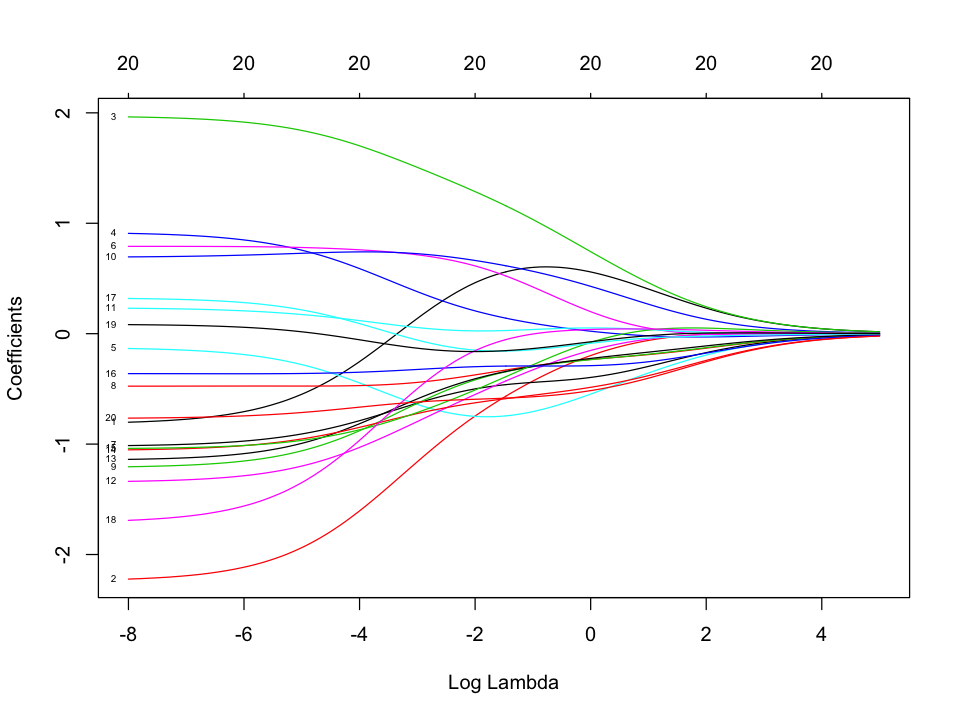

In [14]:
# do a fit with glmnet, which performs a linear fit

lambdaArray <- exp(seq(-8,5,length=200))

ridgeFit <- glmnet(x, y, alpha=0,lambda=lambdaArray)

# coefficients versus lambda
plot(ridgeFit, xvar = "lambda", label = TRUE)

## Linear regression with "Lasso"

The function glmnet with alpha=1 will perform linear regression that maximizes the function

$$\mbox{log}\left(L(\beta)\right) + \lambda \sum_i | \beta_i |$$

where $L$ is the likelihood function.


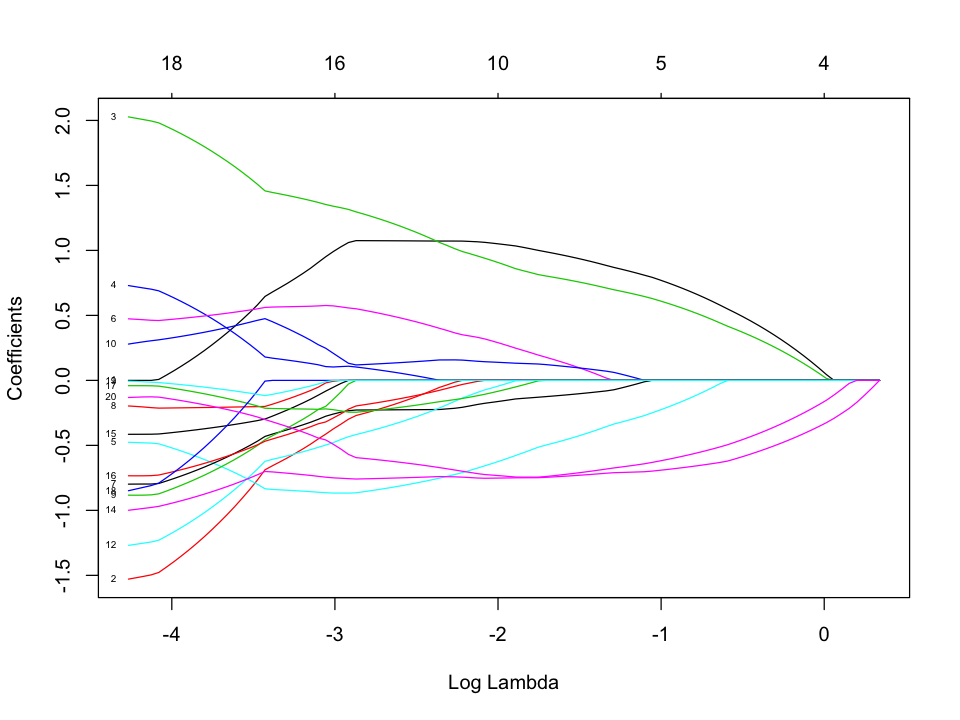

In [15]:
# do a fit with glmnet, which performs a linear fit
lassoFit = glmnet(x, y, alpha=1)

plot(lassoFit, xvar = "lambda", label = TRUE)

We can choose the lambda value using cross-validation. 

Note high values of lambda correspond to simpler models (fewer parameters) while lower values of lambda correspond to more complex models (more parameters).

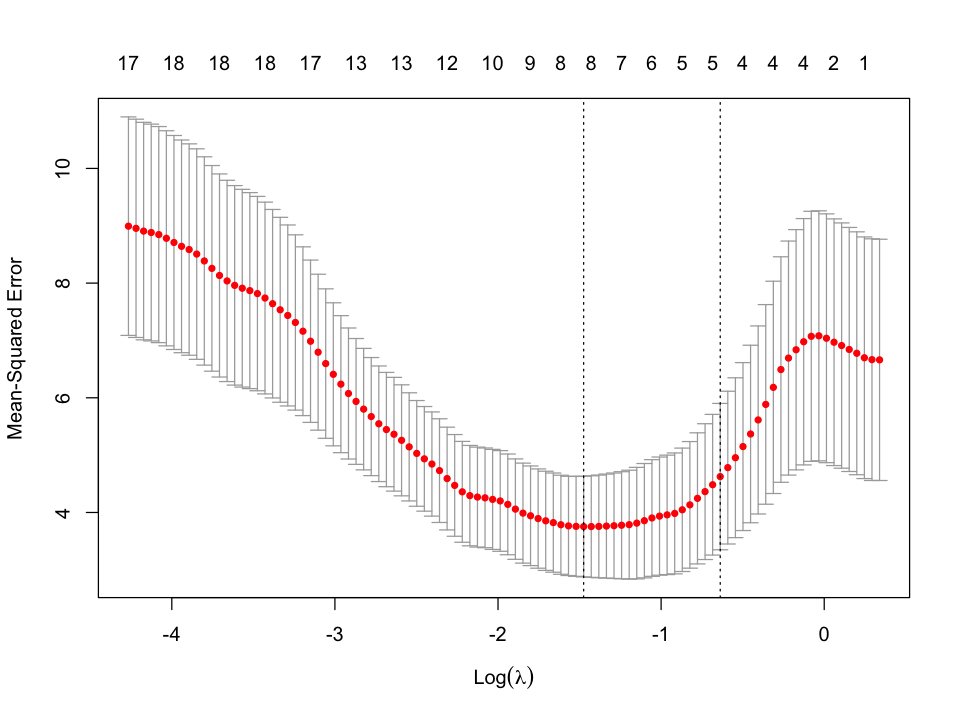

In [16]:
crossValidationOutput <- cv.glmnet(x, y, alpha=1, grouped=FALSE)

plot(crossValidationOutput)